In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [2]:
def lara_graph(X):
    D = distance_matrix(X, X) ** 2
    D[np.diag_indices(D.shape[0])] = 1e6

    n = X.shape[0]
    adjacencia = np.zeros(shape = (n, n))
    for i in tqdm(range(n-1)):
        for j in range(i+1, n):
            minimo = min(D[i, :] + D[j, :])
            if (D[i, j] <= minimo):
                adjacencia[i, j] = 1
                adjacencia[j, i] = 1
    return adjacencia

# normal

## data

In [32]:
sd = 0.1
n = 100

In [33]:
mean = (0, 0)
cov = [[sd, 0], [0, sd]]
x1 = np.random.multivariate_normal(mean, cov, size = n)

mean = (1, 1)
cov = [[sd, 0], [0, sd]]
x2 = np.random.multivariate_normal(mean, cov, size = n)

X = np.concatenate((x1, x2))
y = np.array([-1] * n + [1] * n)

## gg

In [34]:
gg = lara_graph(X)

100%|██████████| 199/199 [00:00<00:00, 493.20it/s]


In [35]:
scores = []
for i, row in enumerate(gg):
    vizinhos = np.where(row == 1)[0]
    
    degree = len(vizinhos)
    opposite = 0
    for vizinho in vizinhos:
        opposite += np.abs(y[i] - y[vizinho]) / 2
    q = 1 - opposite / degree
    scores.append(q)
scores = np.array(scores)
print(sd, np.mean(scores))

0.1 0.9575833333333332


# classificador

In [36]:
w = [-1, 1, 1]
w = w / np.linalg.norm(w)

distances = []
for i, x in enumerate(X):
    x = np.hstack((1, x))
    d = np.dot(x, w)
    distances.append(d)
distances = np.array(distances)
erro = (np.sign(distances) == np.sign(y)) * 1

# plot

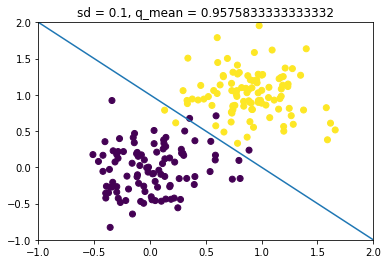

In [57]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.axline((0, 1), (1, 0))
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.title('sd = {}, q_mean = {}'.format(sd, np.mean(scores)));

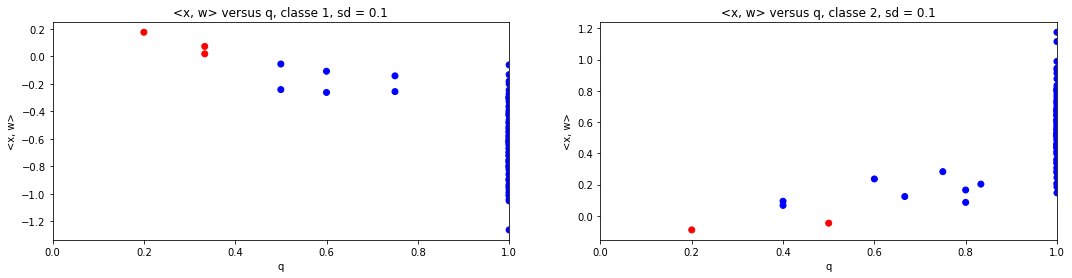

In [58]:
log = np.stack((scores, distances)).T
fig, axis = plt.subplots(1, 2, figsize = (18, 4))

colors = {0:'red', 1:'blue'}

axis[0].scatter(log[:n, 0], log[:n, 1], c = [colors[e] for e in erro[:n]])
axis[0].set_xlim([0, 1])
axis[0].set_title('<x, w> versus q, classe 1, sd = {}'.format(sd));
axis[0].set_xlabel('q')
axis[0].set_ylabel('<x, w>');


axis[1].scatter(log[n:, 0], log[n:, 1], c = [colors[e] for e in erro[n:]])
axis[1].set_xlim([0, 1])
axis[1].set_title('<x, w> versus q, classe 2, sd = {}'.format(sd));
axis[1].set_xlabel('q')
axis[1].set_ylabel('<x, w>');

# multiple

100%|██████████| 399/399 [00:02<00:00, 146.46it/s]


0.1 0.9664583333333333


100%|██████████| 399/399 [00:02<00:00, 142.13it/s]


0.3 0.8705357142857142


100%|██████████| 399/399 [00:02<00:00, 145.77it/s]


0.5 0.800827380952381


100%|██████████| 399/399 [00:02<00:00, 146.50it/s]


0.7 0.7338095238095238


100%|██████████| 399/399 [00:02<00:00, 143.37it/s]


0.9 0.6774880952380952


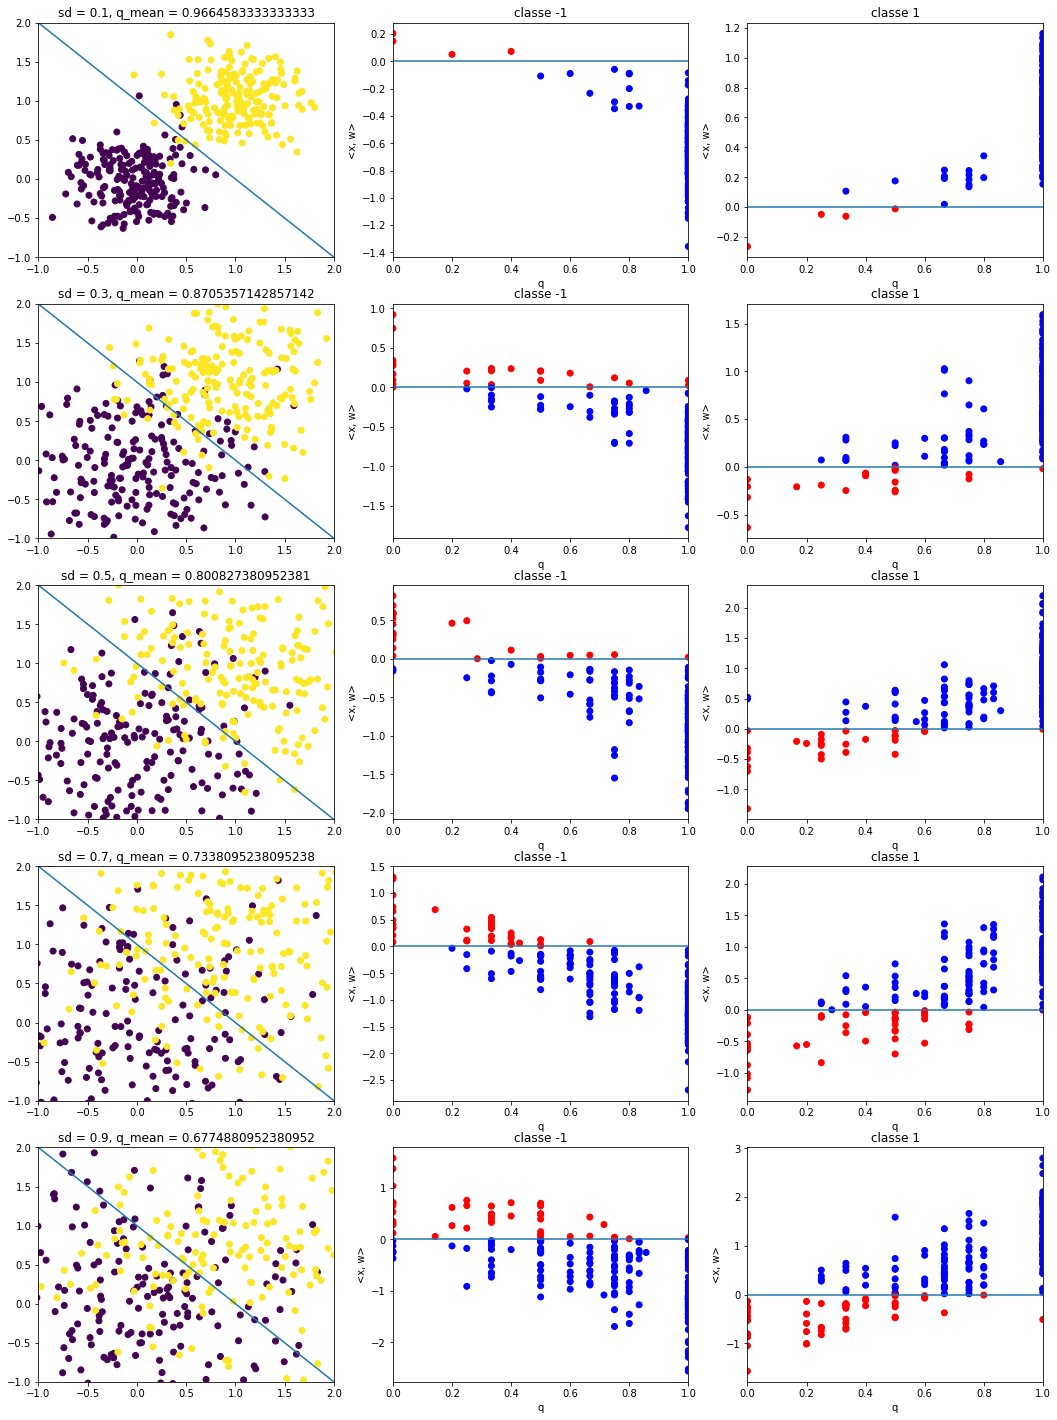

In [60]:
n = 200
sds = [0.1, 0.3, 0.5, 0.7, 0.9]
# sds = [0.1, 0.2]

fig, axis = plt.subplots(len(sds), 3, figsize = (18, 5*len(sds)))

for idx, sd in enumerate(sds):
  # data
  mean = (0, 0)
  cov = [[sd, 0], [0, sd]]
  x1 = np.random.multivariate_normal(mean, cov, size = n)

  mean = (1, 1)
  cov = [[sd, 0], [0, sd]]
  x2 = np.random.multivariate_normal(mean, cov, size = n)

  X = np.concatenate((x1, x2))
  y = np.array([-1] * n + [1] * n)

  # gg
  gg = lara_graph(X)

  scores = []
  for i, row in enumerate(gg):
      vizinhos = np.where(row == 1)[0]
      
      degree = len(vizinhos)
      opposite = 0
      for vizinho in vizinhos:
          opposite += np.abs(y[i] - y[vizinho]) / 2
      q = 1 - opposite / degree
      scores.append(q)
  scores = np.array(scores)
  print(sd, np.mean(scores))

  # classificador
  w = [-1, 1, 1]
  w = w / np.linalg.norm(w)

  distances = []
  for x in X:
      x = np.hstack((1, x))
      d = np.dot(x, w)
      distances.append(d)
  distances = np.array(distances)
  erro = (np.sign(distances) == np.sign(y)) * 1

  # plot
  axis[idx, 0].scatter(X[:, 0], X[:, 1], c = y)
  axis[idx, 0].axline((0, 1), (1, 0))
  axis[idx, 0].set_xlim([-1, 2])
  axis[idx, 0].set_ylim([-1, 2])
  axis[idx, 0].set_title('sd = {}, q_mean = {}'.format(sd, np.mean(scores)));

  log = np.stack((scores, distances)).T
  colors = {0:'red', 1:'blue'}

  axis[idx, 1].scatter(log[:n, 0], log[:n, 1], c = [colors[e] for e in erro[:n]])
  axis[idx, 1].axhline(y=0)
  axis[idx, 1].set_xlim([0, 1])
  axis[idx, 1].set_title('classe -1');
  axis[idx, 1].set_xlabel('q')
  axis[idx, 1].set_ylabel('<x, w>');

  axis[idx, 2].scatter(log[n:, 0], log[n:, 1], c = [colors[e] for e in erro[n:]])
  axis[idx, 2].axhline(y=0)
  axis[idx, 2].set_xlim([0, 1])
  axis[idx, 2].set_title('classe 1'.format(sd));
  axis[idx, 2].set_xlabel('q')
  axis[idx, 2].set_ylabel('<x, w>');